#  importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

%matplotlib inline
sns.set()

# importing Data

In [2]:
wine = pd.read_csv('winequality-red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Understanding Data

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
736,7.7,0.965,0.10,2.1,0.112,11.0,22.0,0.99630,3.26,0.50,9.5,5
1478,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3
337,7.8,0.430,0.32,2.8,0.080,29.0,58.0,0.99740,3.31,0.64,10.3,5
1100,8.4,0.340,0.42,2.1,0.072,23.0,36.0,0.99392,3.11,0.78,12.4,6
420,9.5,0.560,0.33,2.4,0.089,35.0,67.0,0.99720,3.28,0.73,11.8,7


# Exploratory Data Analysis (EDA)

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [8]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
wine.shape

(1599, 12)

<AxesSubplot:>

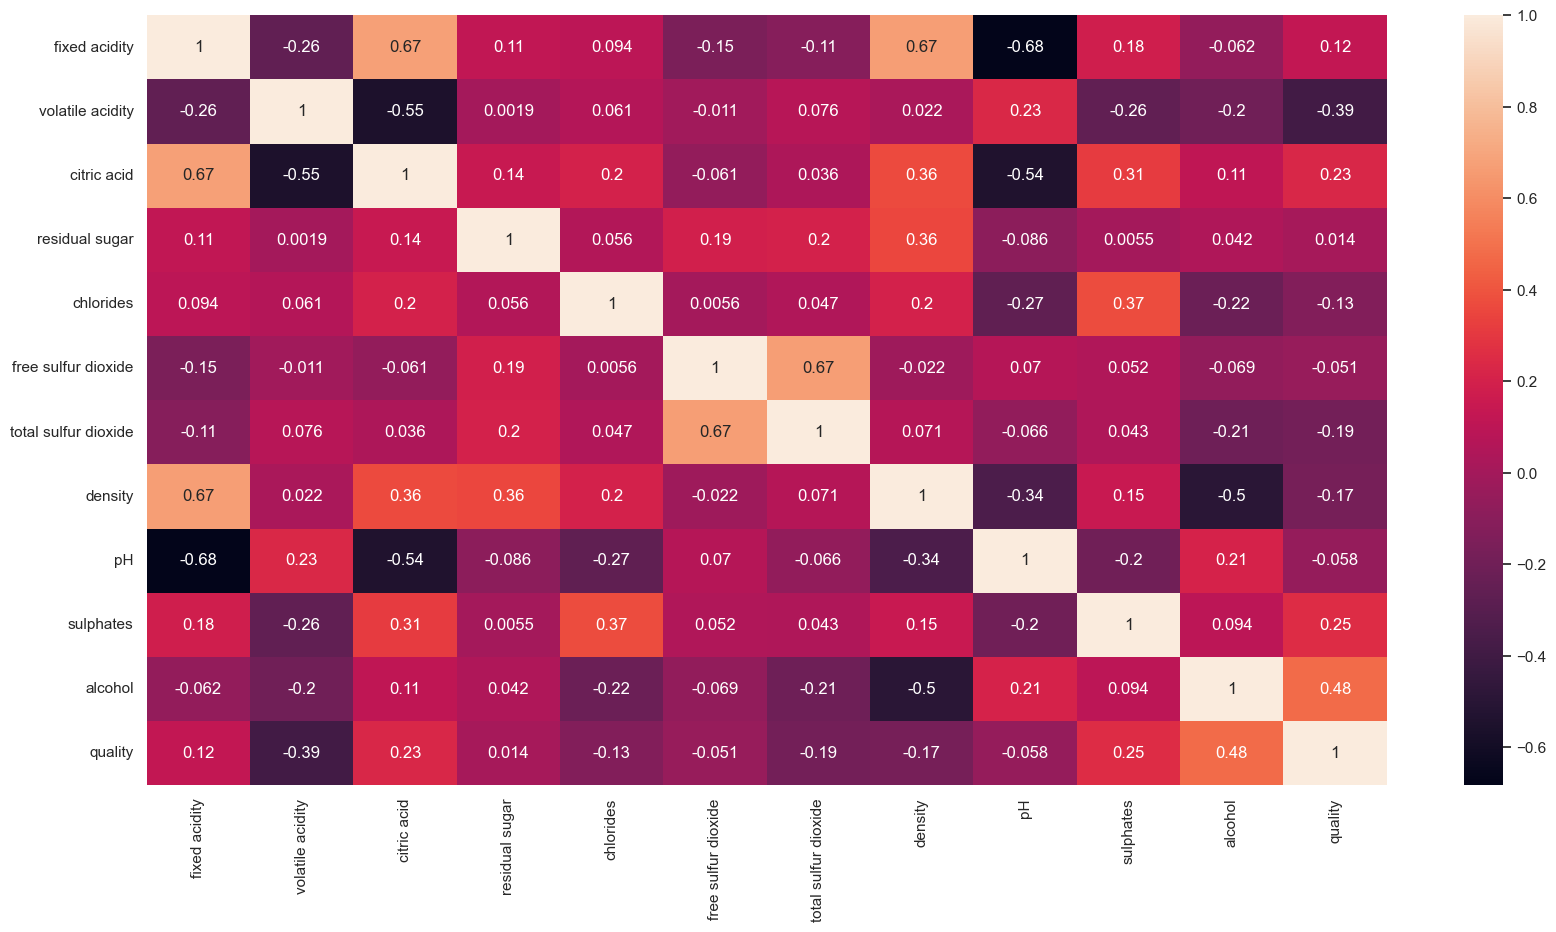

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(wine.corr(),annot=True)

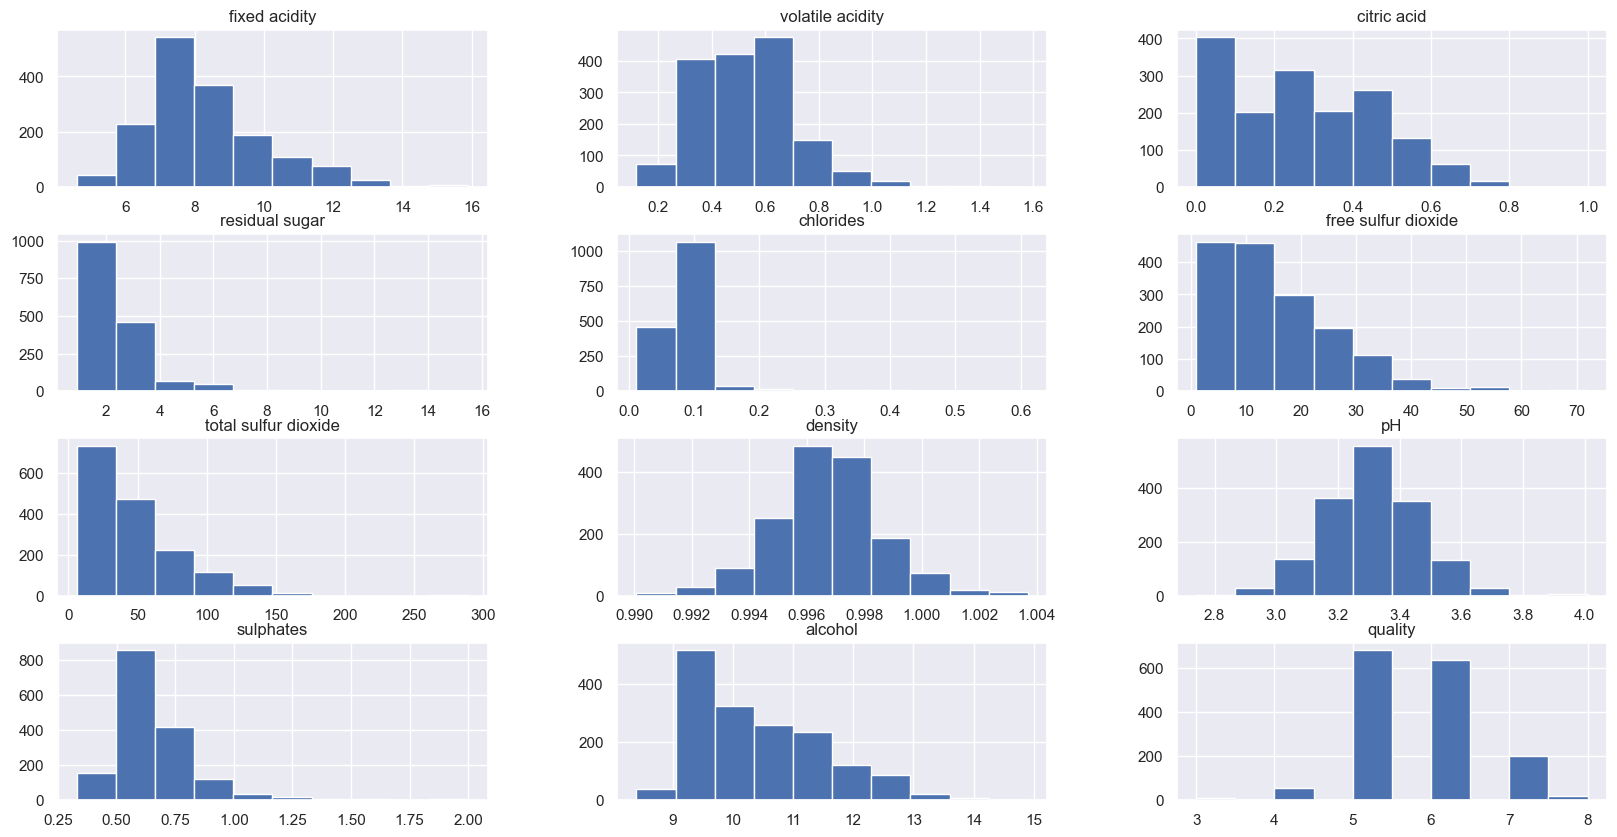

In [11]:
wine.hist(figsize=(20,10))
plt.show()

<AxesSubplot:xlabel='fixed acidity', ylabel='count'>

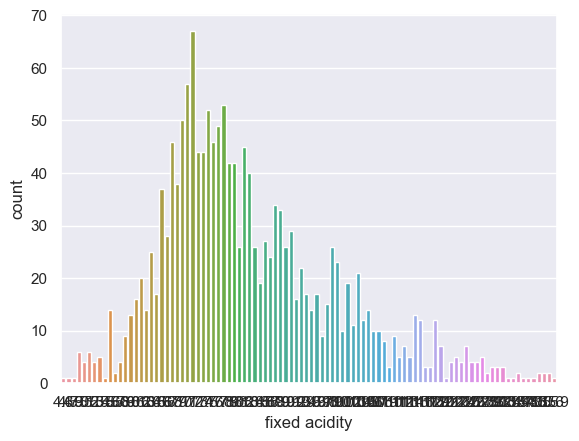

In [12]:
sns.countplot(data=wine ,x="fixed acidity")

#  Cleaning Data

# Deaing with missing data

In [13]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

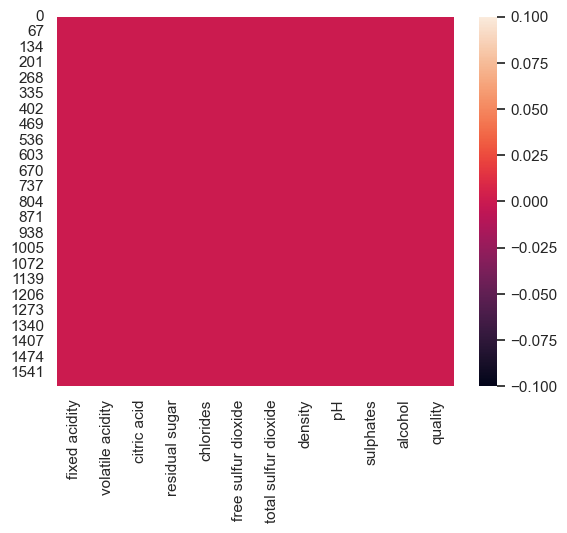

In [14]:
sns.heatmap(wine.isna())

# Dealing with duplicated Data

In [15]:
wine.duplicated().sum()

240

In [16]:
wine[wine.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [17]:
wine.drop_duplicates(inplace=True)

In [18]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [19]:
wine.duplicated().sum()

0

C:\Users\EL_Garhy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

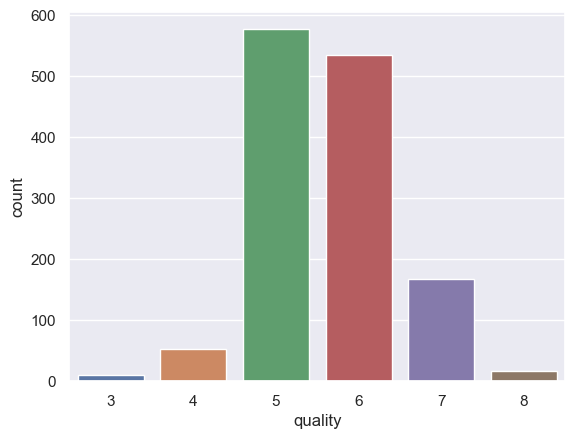

In [20]:
sns.countplot(wine.quality)

In [21]:
wine.quality.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

#  Scaling Data

In [22]:
X = wine.iloc[:,:-1].values
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 5.9  ,  0.55 ,  0.1  , ...,  3.52 ,  0.76 , 11.2  ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [23]:
y = wine.iloc[:,-1].apply(lambda y: 1 if y >= 6 else 0)
y

0       0
1       0
2       0
3       1
5       0
       ..
1593    1
1594    0
1595    1
1597    0
1598    1
Name: quality, Length: 1359, dtype: int64

In [24]:
std = StandardScaler()

In [25]:
X = std.fit_transform(X)
X

array([[-0.52443096,  0.93200015, -1.39325797, ...,  1.29187216,
        -0.57856134, -0.95437429],
       [-0.29406274,  1.91580043, -1.39325797, ..., -0.70839548,
         0.12482157, -0.5845748 ],
       [-0.29406274,  1.25993358, -1.18861732, ..., -0.32124691,
        -0.05102416, -0.5845748 ],
       ...,
       [-1.38831178,  0.11216658, -0.88165635, ...,  1.35639693,
         0.59374351,  0.7097234 ],
       [-1.38831178,  0.63139451, -0.77933603, ...,  1.67902074,
         0.3006673 , -0.21477532],
       [-1.33071973, -1.19956712,  1.01126962, ...,  0.51757501,
         0.00759108,  0.52482366]])

# Spliting data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
print('shape of X_train: ',X_train.shape)

shape of X_train:  (1087, 11)


In [28]:
print('shape of y_train: ',y_train.shape)

shape of y_train:  (1087,)


In [29]:
print('shape of X_test: ',X_test.shape)

shape of X_test:  (272, 11)


In [30]:
print('shape of y_test: ',y_test.shape)

shape of y_test:  (272,)


# Creat Modeling

# Model Using SVC

In [31]:
svc = SVC(C=0.8)
svc.fit(X_train,y_train)
y_pridect_svc = svc.predict(X_test)
print('accuracy_score for Suport Vector Classefier = ',100*accuracy_score(y_test,y_pridect_svc),"%")
print('*'*70)
print('confusion_matrixe for Suport Vector Classefier\n\n',confusion_matrix(y_test,y_pridect_svc))
print('*'*70)
print('classification_report for Suport Vector Classefier\n\n',classification_report(y_test,y_pridect_svc))
print('*'*70)


accuracy_score for Suport Vector Classefier =  77.57352941176471 %
**********************************************************************
confusion_matrixe for Suport Vector Classefier

 [[ 98  37]
 [ 24 113]]
**********************************************************************
classification_report for Suport Vector Classefier

               precision    recall  f1-score   support

           0       0.80      0.73      0.76       135
           1       0.75      0.82      0.79       137

    accuracy                           0.78       272
   macro avg       0.78      0.78      0.78       272
weighted avg       0.78      0.78      0.78       272

**********************************************************************


# Model Using K Neighbors Classifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
y_pridect_knn = knn.predict(X_test)
print('accuracy_score for KNeighborsClassifier = ',100*accuracy_score(y_test,y_pridect_knn),"%")
print('*'*70)
print('confusion_matrixe for KNeighborsClassifier\n\n',confusion_matrix(y_test,y_pridect_knn))
print('*'*70)
print('classification_report for KNeighborsClassifier\n\n',classification_report(y_test,y_pridect_knn))
print('*'*70)


accuracy_score for KNeighborsClassifier =  72.05882352941177 %
**********************************************************************
confusion_matrixe for KNeighborsClassifier

 [[101  34]
 [ 42  95]]
**********************************************************************
classification_report for KNeighborsClassifier

               precision    recall  f1-score   support

           0       0.71      0.75      0.73       135
           1       0.74      0.69      0.71       137

    accuracy                           0.72       272
   macro avg       0.72      0.72      0.72       272
weighted avg       0.72      0.72      0.72       272

**********************************************************************


C:\Users\EL_Garhy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Model Using Random Forest Classifier

In [33]:
clf = RandomForestClassifier(n_estimators=10000)
clf.fit(X_train,y_train)
y_pridect_clf = clf.predict(X_test)
print('accuracy_score for RandomForestClassifier = ',100*accuracy_score(y_test,y_pridect_clf),"%")
print('*'*70)
print('confusion_matrixe for RandomForestClassifier\n\n',confusion_matrix(y_test,y_pridect_clf))
print('*'*70)
print('classification_report for RandomForestClassifier\n\n',classification_report(y_test,y_pridect_clf))
print('*'*70)


accuracy_score for RandomForestClassifier =  79.04411764705883 %
**********************************************************************
confusion_matrixe for RandomForestClassifier

 [[101  34]
 [ 23 114]]
**********************************************************************
classification_report for RandomForestClassifier

               precision    recall  f1-score   support

           0       0.81      0.75      0.78       135
           1       0.77      0.83      0.80       137

    accuracy                           0.79       272
   macro avg       0.79      0.79      0.79       272
weighted avg       0.79      0.79      0.79       272

**********************************************************************


# Model Using Decision Tree Classifier

In [34]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train,y_train)
y_pridect_tree = tree.predict(X_test)
print('accuracy_score for DecisionTreeClassifier = ',100*accuracy_score(y_test,y_pridect_tree),"%")
print('*'*70)
print('confusion_matrixe for DecisionTreeClassifier\n\n',confusion_matrix(y_test,y_pridect_tree))
print('*'*70)
print('classification_report for DecisionTreeClassifier\n\n',classification_report(y_test,y_pridect_tree))
print('*'*70)


accuracy_score for DecisionTreeClassifier =  72.05882352941177 %
**********************************************************************
confusion_matrixe for DecisionTreeClassifier

 [[ 91  44]
 [ 32 105]]
**********************************************************************
classification_report for DecisionTreeClassifier

               precision    recall  f1-score   support

           0       0.74      0.67      0.71       135
           1       0.70      0.77      0.73       137

    accuracy                           0.72       272
   macro avg       0.72      0.72      0.72       272
weighted avg       0.72      0.72      0.72       272

**********************************************************************
